In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

In [14]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=5, noise=0.1)

In [15]:
X = np.hstack([np.ones((X.shape[0], 1)), X])

def best_fit_line(X, y):
    # theta = (X.T * X)^(-1) * X.T * y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

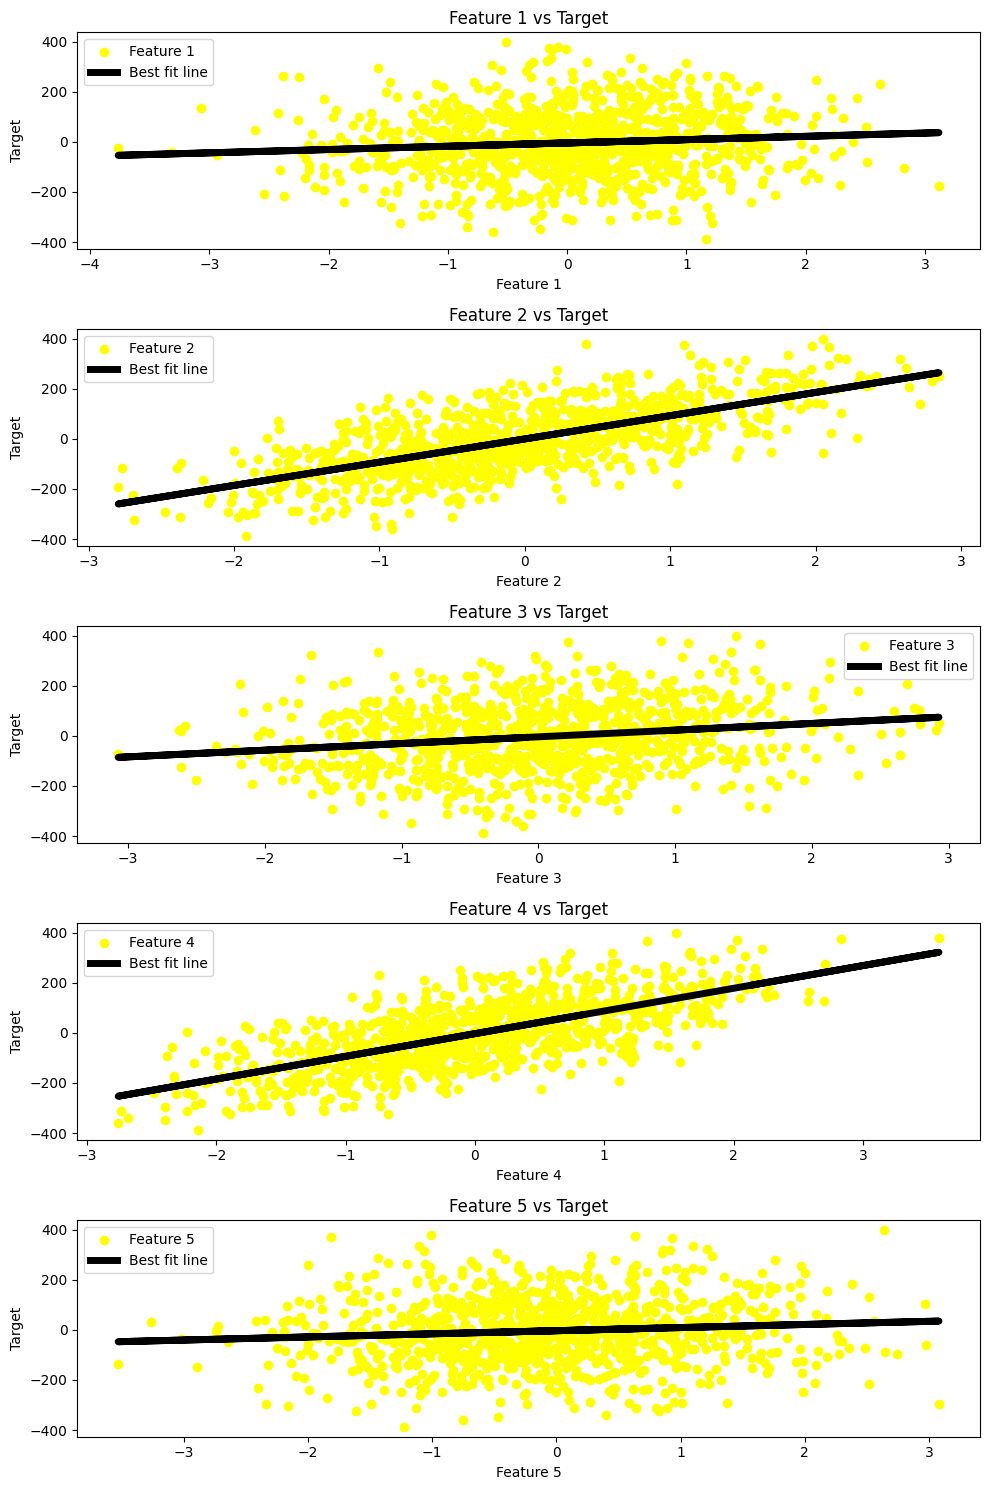

In [16]:
num_features = X.shape[1] - 1

fig, axes = plt.subplots(num_features, 1, figsize=(10, 15))

for i in range(1, num_features + 1):
    
    feature = X[:, i]

    feature_matrix = np.vstack([np.ones(feature.shape), feature]).T
    theta = best_fit_line(feature_matrix, y)

    y_pred = feature_matrix @ theta
    
    axes[i - 1].scatter(feature, y, label=f'Feature {i}', color='yellow')
    axes[i - 1].plot(feature, y_pred, color='black', label='Best fit line', linewidth=5)
    axes[i - 1].legend()
    axes[i - 1].set_xlabel(f'Feature {i}')
    axes[i - 1].set_ylabel('Target')
    axes[i - 1].set_title(f'Feature {i} vs Target')

plt.tight_layout()
plt.show()

## Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

In [17]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000) #the default value is 2 itself

<Axes: >

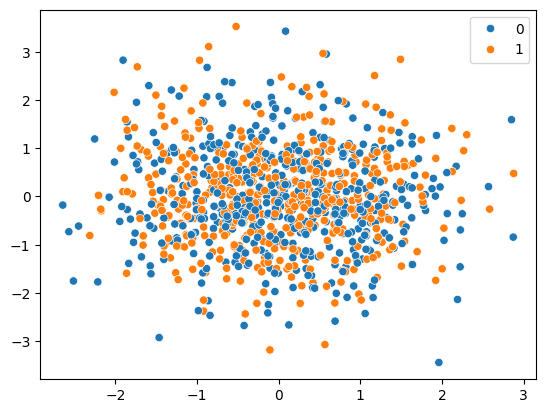

In [18]:
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

## Question 3:
Make a clustering dataset with 2 features and 4 clusters.

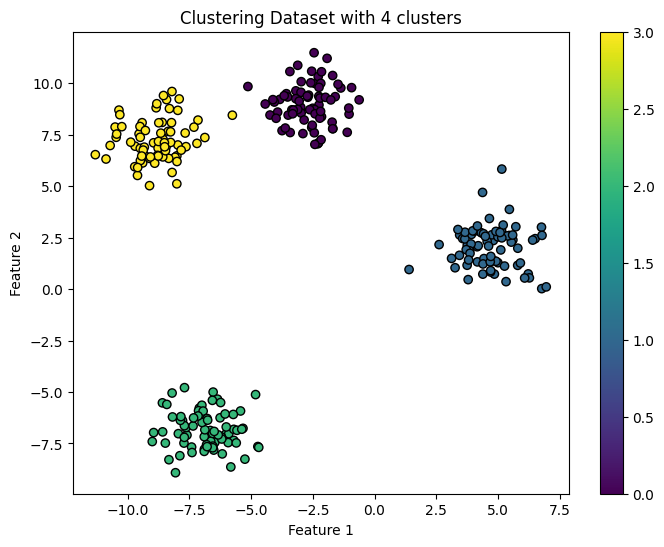

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Clustering Dataset with 4 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [20]:
from bs4 import BeautifulSoup
import requests

In [21]:
url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url)

In [22]:
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', id="main_table_countries_today")

In [23]:
data = []
for row in table.find_all('tr')[1:]:  
    cells = row.find_all('td')
    
    country = cells[0].text.strip()
    continent = cells[1].text.strip()
    population = cells[2].text.strip()
    total_cases = cells[3].text.strip()
    new_cases = cells[4].text.strip()
    total_deaths = cells[5].text.strip()
    new_deaths = cells[6].text.strip()
    total_recovered = cells[7].text.strip()
    new_recovered = cells[8].text.strip()
    active_cases = cells[9].text.strip()
    
    data.append({
        "Country": country,
        "Continent": continent,
        "Population": population,  
        "TotalCases": total_cases,
        "NewCases": new_cases,
        "TotalDeaths": total_deaths,
        "NewDeaths": new_deaths,
        "TotalRecovered": total_recovered,
        "NewRecovered": new_recovered,
        "ActiveCases": active_cases
    })

In [26]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,,North America,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062","6,095"
1,,Asia,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512","14,733"
2,,Europe,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270","4,453"
3,,South America,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962","8,953"
4,,Oceania,"14,895,771",,"33,015",,"14,752,388",,"110,368",31


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,        
    n_features=2,          
    n_informative=2,     
    n_redundant=0,       
    n_clusters_per_class=1,
    weights=[0.95, 0.05],  
    random_state=42
)


In [ ]:
print(f"size of class 0 = {np.sum(y==0)}")
print(f"size of class 1 = {np.sum(y==1)}")

size of class 0 = 945
size of class 1 = 55


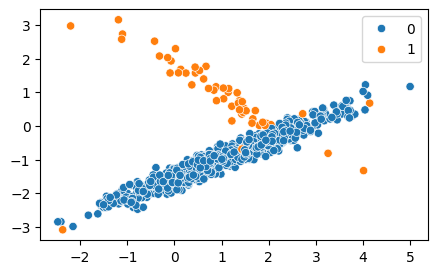

In [ ]:
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.291, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
print(f"size of class 0 = {np.sum(y_resampled==0)}")
print(f"size of class 1 = {np.sum(y_resampled==1)}")

size of class 0 = 945
size of class 1 = 274


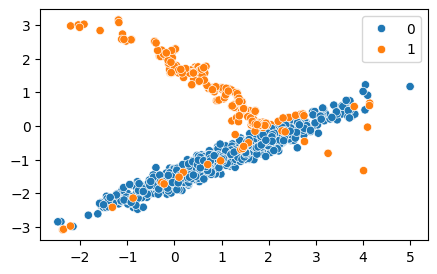

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x=X_resampled[:, 0], y=X_resampled[:, 1], hue=y_resampled)
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(sampling_strategy=0.3333, random_state=42)
X_resampled_2, y_resampled_2 = RUS.fit_resample(X_resampled, y_resampled)

In [ ]:
print(f"size of class 0 = {np.sum(y_resampled_2==0)}")
print(f"size of class 1 = {np.sum(y_resampled_2==1)}")

size of class 0 = 822
size of class 1 = 274


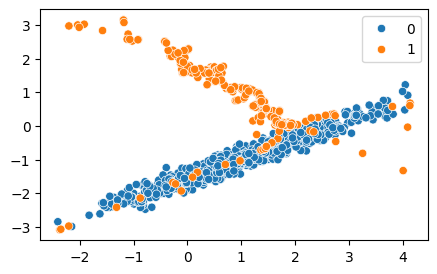

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x=X_resampled_2[:, 0], y=X_resampled_2[:, 1], hue=y_resampled_2)
plt.show()

## Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()

X = dataset.data
y = dataset.target

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(X, columns = dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f"dim of training dataset = {X_train.shape}")
print(f"dim of test dataset = {X_test.shape}")

dim of training dataset = (105, 4)
dim of test dataset = (45, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
X_train_scaled[:5]

array([[-0.4134164 , -1.46200287, -0.09951105, -0.32339776],
       [ 0.55122187, -0.50256349,  0.71770262,  0.35303182],
       [ 0.67180165,  0.21701605,  0.95119225,  0.75888956],
       [ 0.91296121, -0.02284379,  0.30909579,  0.2177459 ],
       [ 1.63643991,  1.41631528,  1.30142668,  1.70589097]])